In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
### 加载数据
df = pd.read_csv('C:/Users/Yan3/Desktop/dataset/credit_default/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.shape

(30000, 25)

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
next_month = df['default.payment.next.month'].value_counts()
next_month

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

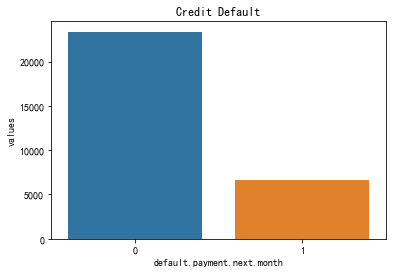

In [6]:
data = pd.DataFrame({'default.payment.next.month':next_month.index,'values':next_month.values})
plt.title('Credit Default')
sns.barplot(x = 'default.payment.next.month',y = 'values', data = data)
plt.show()

In [7]:
## ID没有任何用处
df.drop(['ID'],inplace= True, axis =1)
target = df['default.payment.next.month'].values
columns = df.columns.tolist()
columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [8]:
columns.remove('default.payment.next.month')
features = df[columns].values

In [9]:
## 30%作为测试集,70%作为训练集
from sklearn.model_selection import train_test_split
train_x, test_x,train_y,test_y = train_test_split(features, target, test_size= 0.3)


In [10]:
# 构造各种分类器
classifiers = [
    SVC(random_state=1, kernel='rbf'),
    DecisionTreeClassifier(random_state=1, criterion='gini'),
    RandomForestClassifier(random_state=1, criterion='gini'),
    KNeighborsClassifier(metric='minkowski'),
    AdaBoostClassifier(base_estimator=None),
]

In [11]:
# 分类器名称
classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
    'adaboost',
]

In [12]:
# 分类器参数
classifier_param_grid = [
    {'svc__C': [1], 'svc__gamma': [0.01]},
    {'decisiontreeclassifier__max_depth': [6, 9, 11]},
    {'randomforestclassifier__n_estimators': [3, 5, 6]},
    {'kneighborsclassifier__n_neighbors': [4, 6, 8]},
    {'adaboost__n_estimators': [10, 50, 100]},
]

In [13]:
# 使用 GridSearchCV 进行参数调优
def GridSearchCV_work(model_name, pipeline, train_x, train_y, test_x, test_y, param_grid, score='accuracy'):
    gridsearch = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=score, cv=3)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print(model_name + ':')
    print("GridSearch最优参数：", search.best_params_)
    print("GridSearch最优分数： %0.4lf" % search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print("测试集准确率 %0.4lf" % accuracy_score(test_y, predict_y))

In [14]:
# 通过 for 循环调用函数
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    GridSearchCV_work(model_name, pipeline, train_x, train_y, test_x, test_y, model_param_grid, score='accuracy')


svc:
GridSearch最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最优分数： 0.8160
测试集准确率 0.8166
decisiontreeclassifier:
GridSearch最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch最优分数： 0.8173
测试集准确率 0.8149
randomforestclassifier:
GridSearch最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch最优分数： 0.7989
测试集准确率 0.8001
kneighborsclassifier:
GridSearch最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch最优分数： 0.8046
测试集准确率 0.7993
adaboost:
GridSearch最优参数： {'adaboost__n_estimators': 10}
GridSearch最优分数： 0.8179
测试集准确率 0.8182
